In [4]:
import cv2
import json
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

In [5]:
test_images_path = glob.glob('./test_images/*_dst.jpg')
test_images_path

['./test_images/straight_lines1_dst.jpg',
 './test_images/test2_dst.jpg',
 './test_images/test6_dst.jpg',
 './test_images/test3_dst.jpg',
 './test_images/test1_dst.jpg',
 './test_images/test4_dst.jpg',
 './test_images/straight_lines2_dst.jpg',
 './test_images/test5_dst.jpg']

In [20]:
src = np.float32([[600, 450], [200, 720], [1180, 720], [700, 450]])
dst = np.float32([[200, 0], [200, 720], [1080, 720], [1080, 0]])

In [21]:
M = cv2.getPerspectiveTransform(src, dst)
MInv = cv2.getPerspectiveTransform(dst, src)

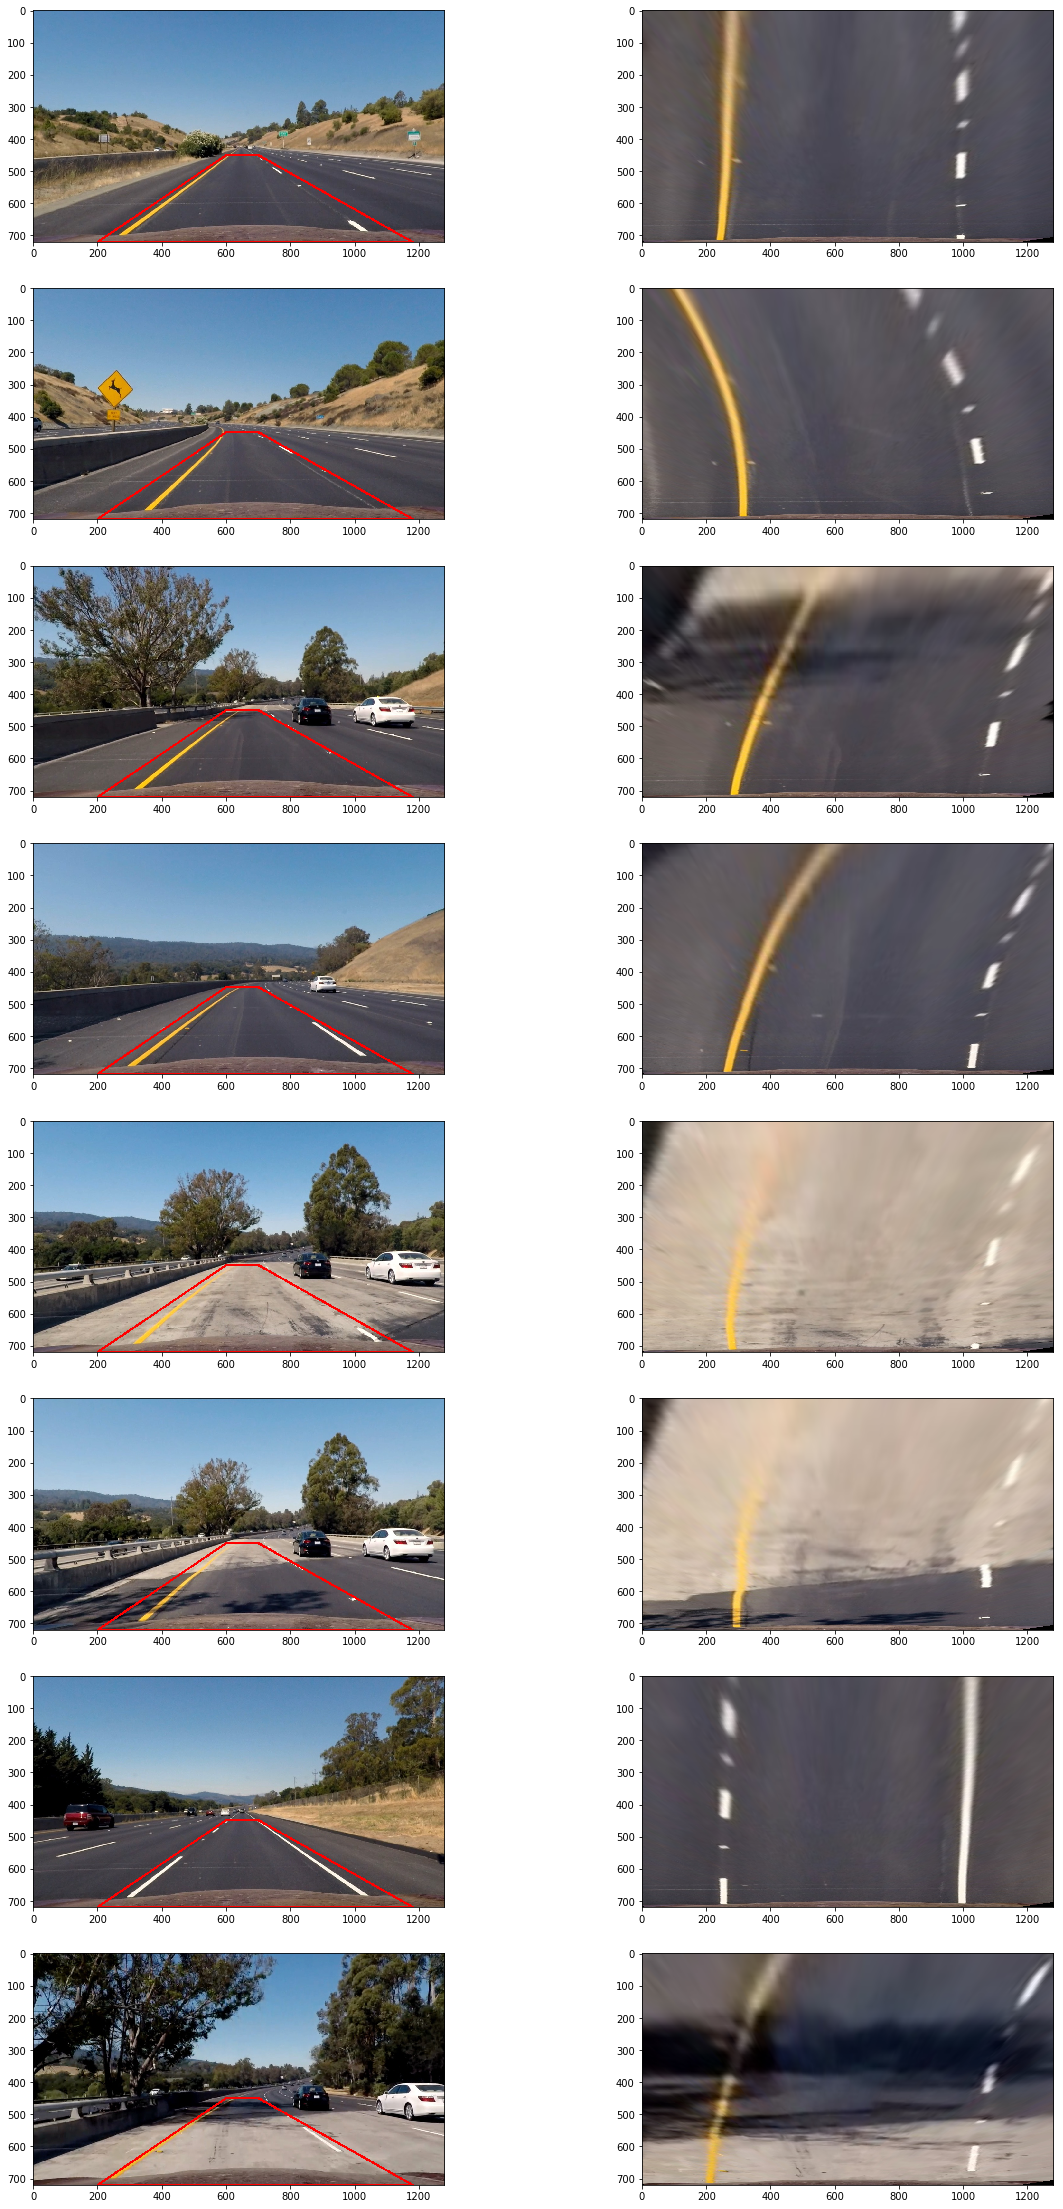

In [22]:
fig, axes = plt.subplots(8, 2, figsize=(20, 5*8))
# axes = axes.flatten()
for index, path in enumerate(test_images_path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    
    img_warped = cv2.warpPerspective(img, M, dsize=(w, h))
        
    cv2.polylines(img, [src.astype(np.int32)], True, (255, 0, 0), thickness=5)
        
    axes[index, 0].imshow(img)
    axes[index, 1].imshow(img_warped)
    

In [23]:
perspective_mtx = {
    'M': M,
    'MInv': MInv
}

In [25]:
with open('./experimental/perspective_mtx.pickle', 'wb') as f:
    pickle.dump(perspective_mtx, f)